# ABEL linac tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the linac and beams

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 0.2, 0.2 # [m]
driver.num_particles = 40000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5
stage.enable_radiation_reaction = False

# define first stage (half length)
first_stage = StageQuasistatic2d()
first_stage.driver_source = driver
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag
first_stage.enable_radiation_reaction = stage.enable_radiation_reaction

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.02
source.bunch_length = 18e-6 # [m]
source.z_offset = -36e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 5000
source.jitter.t = driver.jitter.t

# define interstage
#interstage = InterstageBasic()
interstage = InterstageElegant()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = lambda E: np.min([1.0, 100e9/E]) # [T]

# define linac
linac = PlasmaLinac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

### Run simulations

In [3]:
linac.run('linac_example', num_shots=1, overwrite=True, parallel=False);

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 5.0 GeV, -1.60 nC, 2.0% rms, 161.4/0.5 µm-rad)
Tracking element 2 (StageQuasistatic2d, stage 1, s = 2.5 m, 21.3 GeV, -1.60 nC, 3.6% rms, 161.3/0.6 µm-rad)
Tracking element 3 (InterstageElegant, stage 1, s = 10.3 m, 21.3 GeV, -1.60 nC, 3.4% rms, 171.0/0.6 µm-rad)
Tracking element 4 (StageQuasistatic2d, stage 2, s = 15.3 m, 53.4 GeV, -1.60 nC, 2.1% rms, 172.2/0.6 µm-rad)
Tracking element 5 (InterstageElegant, stage 2, s = 27.8 m, 53.4 GeV, -1.60 nC, 2.1% rms, 179.8/0.6 µm-rad)
Tracking element 6 (StageQuasistatic2d, stage 3, s = 32.8 m, 85.2 GeV, -1.60 nC, 1.4% rms, 180.5/0.6 µm-rad)
Tracking element 7 (InterstageElegant, stage 3, s = 48.6 m, 85.2 GeV, -1.60 nC, 1.4% rms, 195.1/0.6 µm-rad)
Tracking element 8 (StageQuasistatic2d, stage 4, s = 53.6 m, 117.0 GeV, -1.60 nC, 1.0% rms, 196.7/0.6 µm-rad)
Tracking element 9 (InterstageElegant, stage 4, s = 72.1 m, 117.0 GeV, -1.60 nC, 1.0% rms, 208.3/0.7 µm-rad)
Tracking element 10 (StageQuasi

### Plot the wakefield

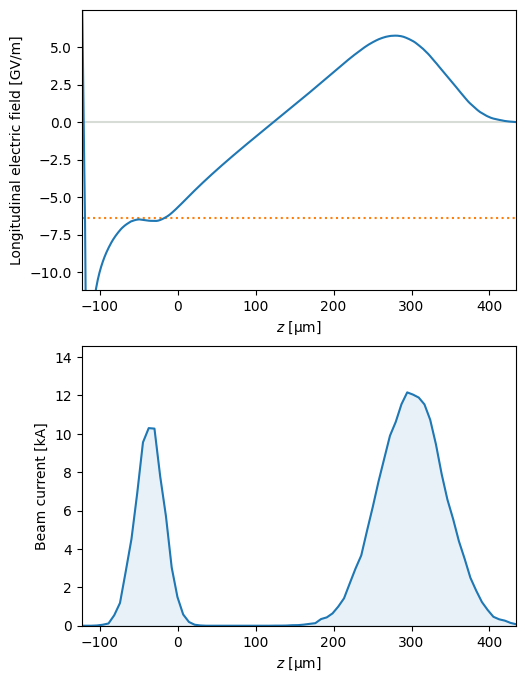

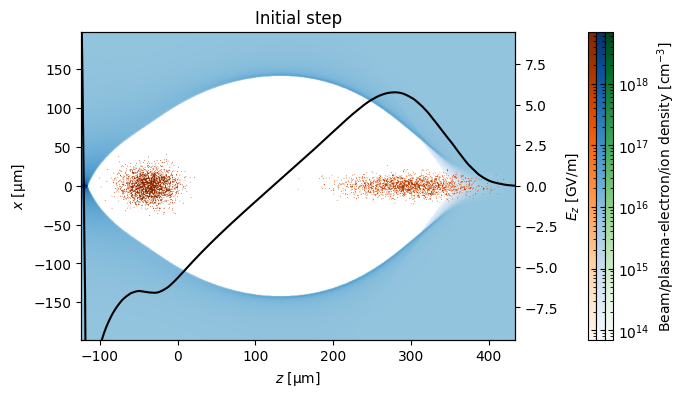

In [4]:
# plot the first-stage wakefield
linac.first_stage.plot_wakefield()
linac.first_stage.plot_wake()

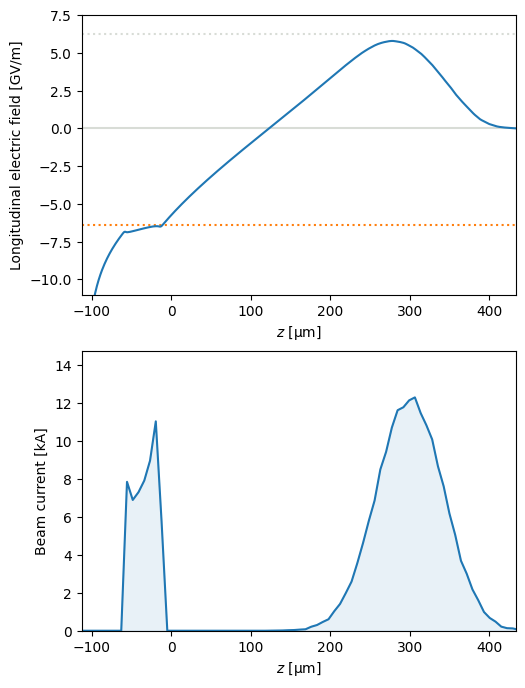

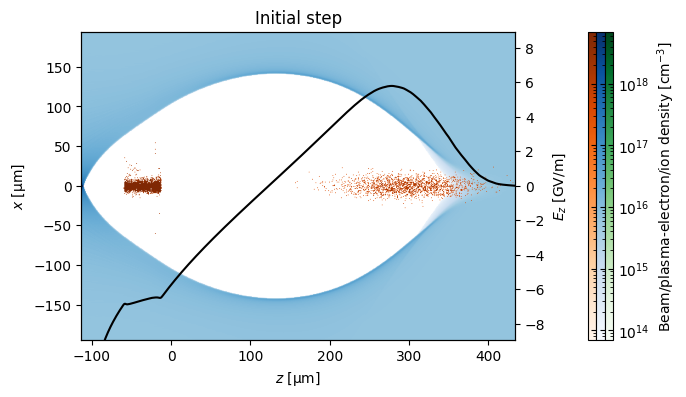

In [5]:
# plot the last-stage wakefield
linac.last_stage.plot_wakefield()
linac.last_stage.plot_wake()

### Plot beam evolution and survey

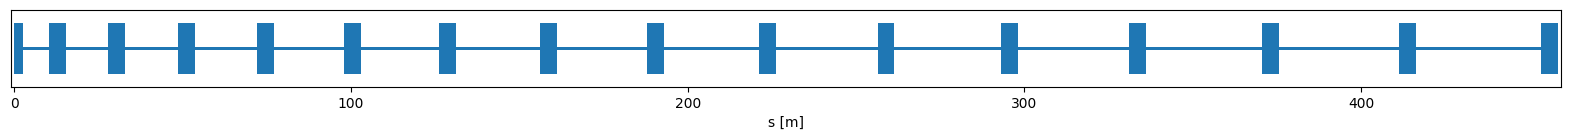

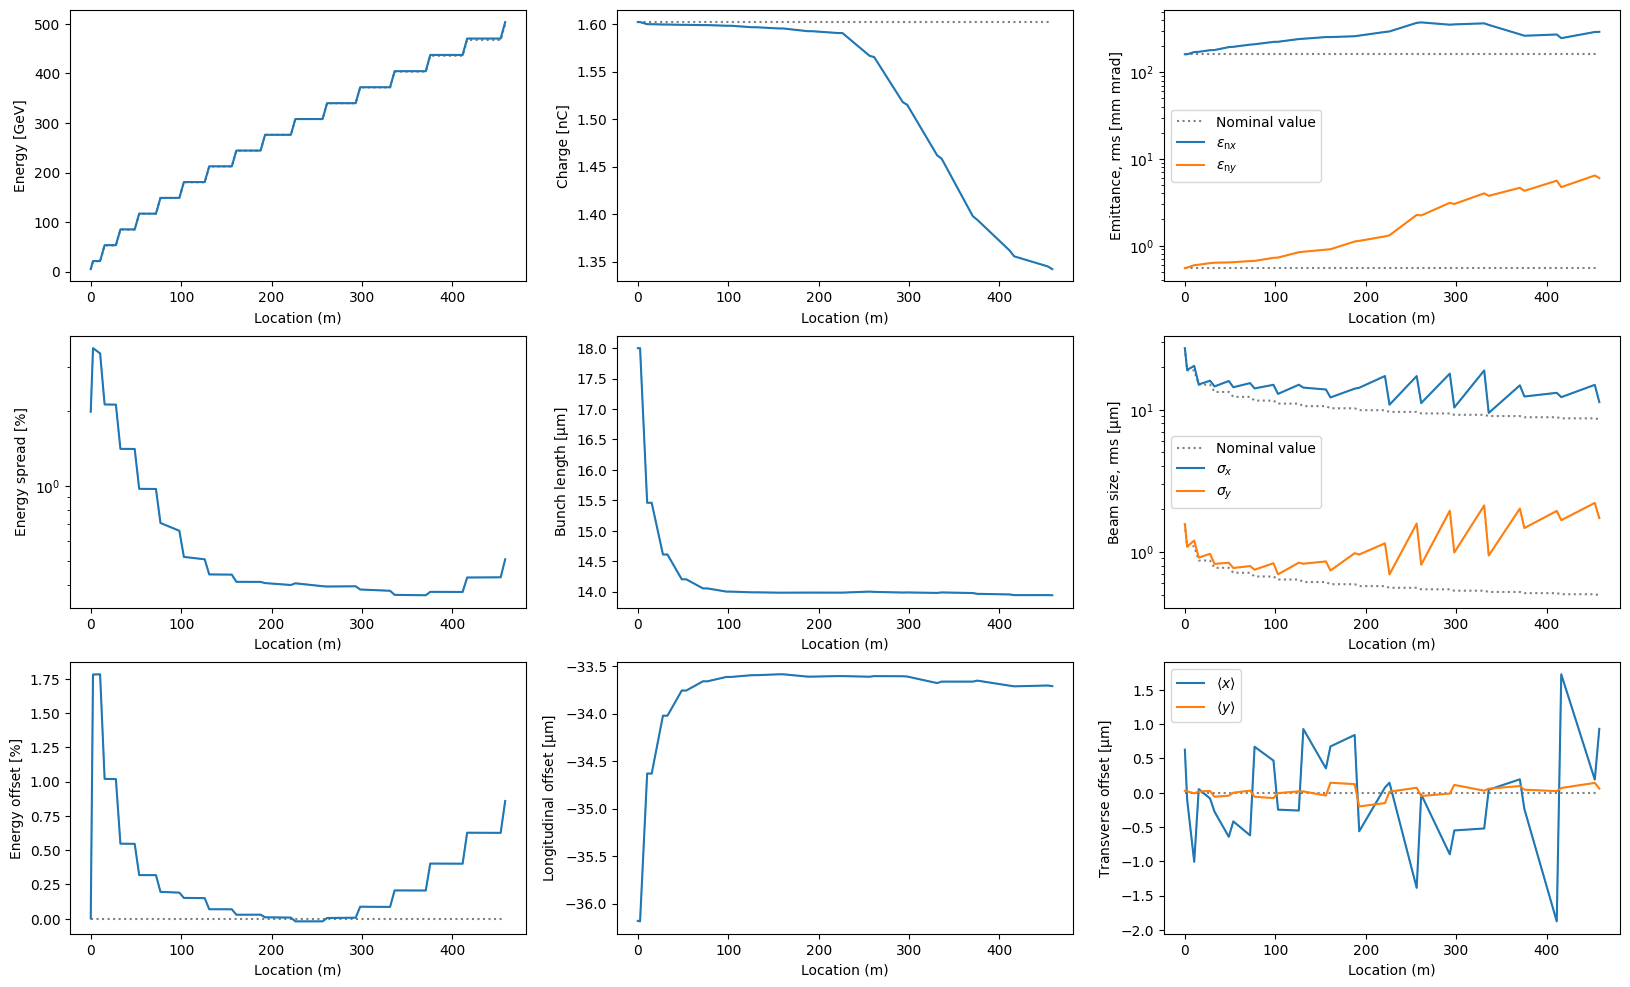

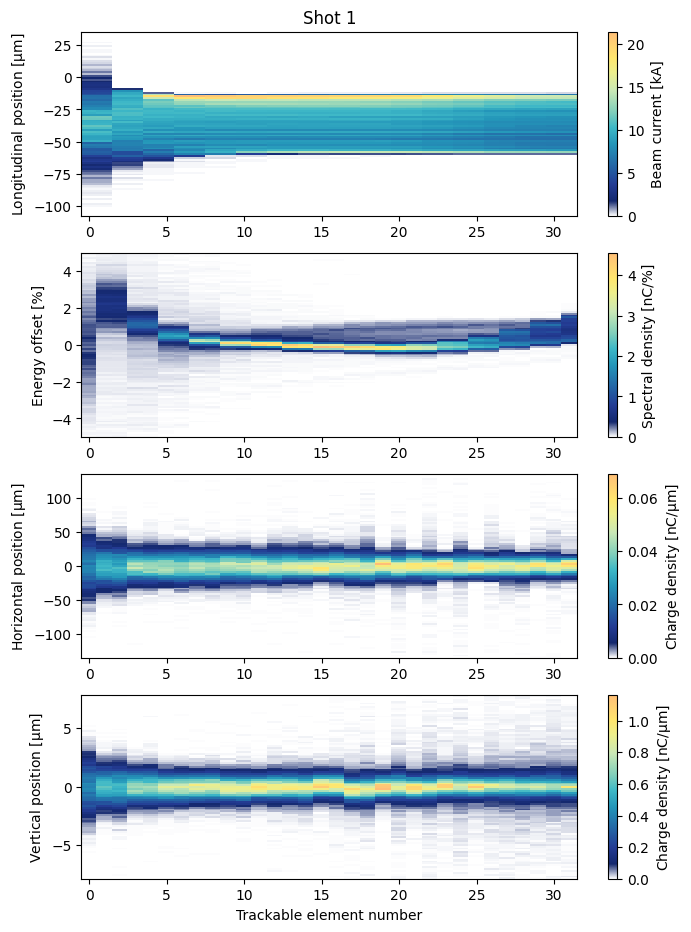

In [6]:
# plot linac survey
linac.plot_survey()

# plot beam evolution
linac.plot_evolution()
linac.plot_waterfalls()

In [7]:
linac.animate_sideview_x()
linac.animate_sideview_y()
linac.animate_phasespace_x()
linac.animate_phasespace_y()
linac.animate_lps()

'run_data/linac_example/plots/lps_shot0.gif'

![](run_data/linac_example/plots/lps_shot0.gif)